In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from datetime import datetime
import seaborn as sn

In [2]:
df = pd.read_csv('G_PSQL_data/JAN_sample_raw.txt')
from functions import remove_outliers
df = remove_outliers(df)


C:\Users\broug\AppData\Local\Temp\ipykernel_7692\1938849531.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('G_PSQL_data/JAN_sample_raw.txt')


In [12]:
sample.drop(columns=['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'no_name', 'longest_add_gtime', 'total_add_gtime', 'canellation_code', 'dup', 'diverted', 'cancelled'], inplace=True)

In [3]:
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-01,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,AA,AA_CODESHARE,AA,5216,OH,N256PS,5216,11278,DCA,...,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,AA,AA_CODESHARE,AA,5225,OH,N594NN,5225,11057,CLT,...,761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,AA,AA_CODESHARE,AA,5227,OH,N573NN,5227,11057,CLT,...,651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,NK,NK,NK,811,NK,N640NK,811,13204,MCO,...,1189,3.0,0.0,14.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112181,2018-01-31,DL,DL_CODESHARE,DL,6283,G7,N658CA,6283,13487,MSP,...,980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112182,2018-01-31,DL,DL_CODESHARE,DL,6284,G7,N340CA,6284,10693,BNA,...,442,0.0,0.0,0.0,0.0,64.0,NaN,NaN,NaN,NaN
112183,2018-01-31,DL,DL_CODESHARE,DL,6285,G7,N668CA,6285,13244,MEM,...,610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112188,2018-01-31,DL,DL_CODESHARE,DL,5793,CP,N610CZ,5793,12889,LAS,...,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
sample['dep_time'] = pd.to_datetime(sample['dep_time'], format='%H%M', errors='coerce')
sample['arr_time'] = pd.to_datetime(sample['arr_time'], format='%H%M', errors='coerce')

In [18]:
nulls = sample.isnull().sum()
(nulls / len(sample) * 100).sort_values(ascending=False)

arr_time               2.006382
arr_delay              1.787115
air_time               1.770180
actual_elapsed_time    1.770180
dep_time               1.605284
taxi_in                1.602610
wheels_on              1.600827
dep_delay              1.578544
taxi_out               1.559826
wheels_off             1.558043
tail_num               0.368119
crs_elapsed_time       0.000891
cancelled              0.000000
dup                    0.000000
crs_arr_time           0.000000
flights                0.000000
diverted               0.000000
fl_date                0.000000
mkt_unique_carrier     0.000000
crs_dep_time           0.000000
dest_city_name         0.000000
dest                   0.000000
dest_airport_id        0.000000
origin_city_name       0.000000
origin                 0.000000
origin_airport_id      0.000000
op_carrier_fl_num      0.000000
op_unique_carrier      0.000000
mkt_carrier_fl_num     0.000000
mkt_carrier            0.000000
branded_code_share     0.000000
distance

In [22]:
from functions import rename_brand_code, remove_outliers
sample = rename_brand_code(sample)

In [24]:
sample = remove_outliers(sample)

In [3]:
sample.drop(columns='Unnamed: 0', inplace=True)

In [178]:
# distance is split into quantiles which correspond to 31-416, 417-867, 868, 4963
from functions import process_distance
df = process_distance(df)

TypeError: an integer is required (got type str)

In [6]:
sample.to_csv('G_PSQL_data/JAN_sample_processing.csv', index=False)

In [14]:
newdf.to_csv('G_PSQL_data/jan_cleaned.csv', index=False)

#### passenger table processing

In [68]:
sample = pd.read_csv('G_PSQL_data/JAN_passengers.txt', parse_dates=True)

In [69]:
flights = pd.read_csv('G_PSQL_data/super_cleaned.csv')
flights

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,dest,dist_cats,origin_airport_id,dest_airport_id,arr_delay,crs_elapsed_time,dep_hour,arr_hour,week_day
0,2019-01-01 00:01:00,NK,NK,LAX,OAK,short,12892,13796,-6.0,81.0,19,20,1
1,2019-01-01 00:01:00,AA,OH,DCA,BDL,short,11278,10529,-15.0,75.0,13,13,1
2,2019-01-01 00:01:00,AA,OH,CLT,BTV,medium,11057,10785,-16.0,132.0,18,20,1
3,2019-01-01 00:01:00,AA,OH,CLT,MKE,medium,11057,13342,-20.0,136.0,16,17,1
4,2019-01-01 00:01:00,NK,NK,MCO,SJU,long,13204,14843,17.0,155.0,23,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108432,2018-01-31 00:01:00,DL,G7,MSP,RDU,long,13487,14492,-33.0,161.0,15,18,2
108433,2018-01-31 00:01:00,DL,G7,BNA,RDU,medium,10693,14492,64.0,225.0,20,22,2
108434,2018-01-31 00:01:00,DL,G7,MEM,DTW,medium,13244,11433,-21.0,119.0,6,8,2
108435,2018-01-31 00:01:00,DL,CP,LAS,LAX,short,12889,12892,-7.0,90.0,9,10,2


In [70]:
sample = sample[sample['year'] > 2016]

In [62]:
sample = sample[(sample['dest_country_name'] =='United States') & (sample['origin_country_name'] == 'United States')]

In [66]:
sample.drop(columns=['dest_country', 'dest_country_name', 'origin_country_name', 'origin_country', 'data_source'], inplace=True)

C:\Users\broug\AppData\Local\Temp\ipykernel_336\1267708381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.drop(columns=['dest_country', 'dest_country_name', 'origin_country_name', 'origin_country', 'data_source'], inplace=True)


In [136]:
sample = sample[(sample['dest_country'] == 'US') & (sample['origin_country'] == 'US')]

In [144]:
sample['op_unique_carrier'] = sample['unique_carrier']

C:\Users\broug\AppData\Local\Temp\ipykernel_336\2854837492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['op_unique_carrier'] = sample['unique_carrier']


In [89]:
df.drop(columns=['year', 'month'], inplace=True)

In [91]:
df.to_csv('G_PSQL_data/flights_passengers.csv', index=False)

In [134]:
df['total_passengers'] = df['passengers']

In [148]:
dest_airport = df.groupby(['dest_airport_id'], as_index=False).agg({'passengers': 'sum', 'mail': 'mean', 'freight': 'mean', 'arr_delay': 'mean', 'unique_carrier': 'count'}).sort_values(by='passengers', ascending=False)

In [149]:
origin_airport = df.groupby('origin_airport_id', as_index=False).agg({'passengers': 'sum', 'mail': 'mean', 'freight': 'mean', 'arr_delay': 'mean', 'unique_carrier': 'size'})

In [151]:
origin_airport['cargo'] = origin_airport['mail'] + origin_airport['freight']

In [152]:
origin_airport['cargo/carrier'] = origin_airport['cargo'] / origin_airport['unique_carrier']
origin_airport['passengers/carrier'] = origin_airport['passengers'] / origin_airport['unique_carrier']
origin_airport['cargo/passengers'] = origin_airport['cargo'] / origin_airport['passengers'] 
origin_airport.drop(columns=['mail', 'freight'], inplace=True)
origin_airport

,origin_airport_id,passengers,arr_delay,unique_carrier,cargo,cargo/carrier,passengers/carrier,cargo/passengers
0,10135,495119,11.238754,289,19.166090,0.066319,1713.214533,0.000039
1,10136,421992,11.861111,216,355.333333,1.645062,1953.666667,0.000842
2,10140,10211746,-2.496269,3752,43383.426439,11.562747,2721.680704,0.004248
3,10141,50479,-4.727273,22,0.000000,0.000000,2294.500000,0.000000
4,10146,81284,-6.357143,42,0.000000,0.000000,1935.333333,0.000000
...,...,...,...,...,...,...,...,...
355,15841,26158,-11.666667,36,10507.055556,291.862654,726.611111,0.401677
356,15919,3122420,1.142930,1952,97.253074,0.049822,1599.600410,0.000031
357,15991,8329,-15.393939,33,7836.939394,237.483012,252.393939,0.940922
358,16101,347598,2.925926,54,820.000000,15.185185,6437.000000,0.002359


In [162]:
origin_airport.sort_values(by='arr_delay', ascending=False)

,origin_airport_id,passengers,arr_delay,unique_carrier,cargo,cargo/carrier,passengers/carrier,cargo/passengers
244,13832,1916,92.000000,3,0.000000,0.000000,638.666667,0.000000
254,14006,24814,39.160000,25,0.000000,0.000000,992.560000,0.000000
158,12244,58475,39.043478,46,345.543478,7.511815,1271.195652,0.005909
17,10333,5261,39.000000,20,0.000000,0.000000,263.050000,0.000000
275,14259,8319,35.333333,12,0.000000,0.000000,693.250000,0.000000
...,...,...,...,...,...,...,...,...
314,14802,1389,-17.333333,3,0.000000,0.000000,463.000000,0.000000
274,14256,41207,-18.190476,63,12229.873016,194.124969,654.079365,0.296791
329,15008,8506,-18.666667,6,0.000000,0.000000,1417.666667,0.000000
180,12519,11116,-22.625000,16,0.000000,0.000000,694.750000,0.000000


<AxesSubplot:xlabel='passengers', ylabel='arr_delay'>

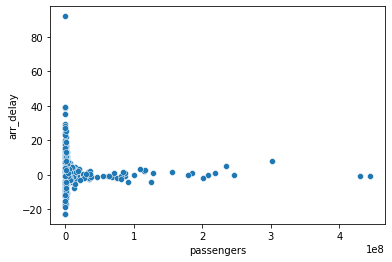

In [172]:
sn.scatterplot(x=origin_airport['passengers'], y=origin_airport['arr_delay'])

In [191]:
df = pd.read_csv('G_PSQL_data/JAN_sample_no_outliers.csv')
df = df[df['crs_elapsed_time'] < 500]

In [192]:
df['dist_cats'] = pd.qcut(df['distance'], 3, labels=['short', 'medium', 'long'])


In [193]:
df['fl_date'] = pd.to_datetime(df['fl_date'], format='%Y-%m-%d', errors='coerce')

In [194]:
df.drop(columns='Unnamed: 0', inplace=True)

In [209]:
df.to_csv('final_process.csv', index=False)

#### hourly flights

In [198]:
df = pd.read_csv('final_process.csv')

In [1]:
df = pd.read_csv('G_PSQL_data/JAN_sample_raw.txt', parse_dates=['crs_dep_time', 'crs_arr_time'])

NameError: name 'pd' is not defined

In [5]:
df['late_binary'] = 0
late = df['arr_delay'] > 0
df.loc[late, 'late_binary'] = 1

In [34]:
from functions import *
df['dep_hour'] = pd.to_datetime(df['crs_dep_time'], format='%H%M', errors='coerce').round('60min').dt.hour
df['arr_hour'] = pd.to_datetime(df['crs_arr_time'], format='%H%M', errors='coerce').round('60min').dt.hour
df['weekday'] = pd.to_datetime(df['fl_date'], format='%Y-%m-%d', errors='coerce').dt.weekday
df['month_day'] = pd.to_datetime(df['fl_date'], format='%Y-%m-%d', errors='coerce').dt.day

In [7]:
from functions import airport_hour_avgs, tail_num_avg, process_carriers, process_hourly, process_weekly, remove_outliers, process_times
df = process_times(df)
df = remove_outliers(df)
df = airport_hour_avgs(df)
df = tail_num_avg(df)
df = process_carriers(df)
df = process_hourly(df)
df = process_weekly(df)

#### airport table

In [21]:
airports = df.groupby('dest_airport_id').agg(late=('late_binary', 'sum'), total=('late_binary', 'size'))
airports['total_percent_late'] = (airports['late'] / airports['total']) * 100
airports.drop(columns=['total', 'late'], inplace=True)

In [38]:
df.groupby(['dest_airport_id', 'weekday', 'arr_hour'], as_index=False).agg(airport_weekly_hourly_arr=('arr_delay', 'mean'))

,dest_airport_id,weekday,arr_hour,airport_weekly_hourly_arr
0,10135,0,10.0,-3.50
1,10135,0,12.0,86.00
2,10135,0,16.0,16.00
3,10135,0,17.0,9.75
4,10135,0,19.0,-26.00
...,...,...,...,...
18776,16218,6,0.0,-4.00
18777,16218,6,11.0,28.00
18778,16218,6,16.0,-8.00
18779,16218,6,17.0,-5.50


In [ ]:
df.drop(columns=['fl_date','op_carrier_fl_num','taxi_out','taxi_in','taxi_total',

In [6]:
reduced_delay_flight = df['arr_delay'] < df['dep_delay']
df['reduced_delay_flight'] = 0
df.loc[reduced_delay_flight, 'reduced_delay_flight'] = 1

In [30]:
carrier_times = df.groupby('op_unique_carrier', as_index=False).agg(avg_actual=('actual_elapsed_time', 'mean'), pred=('crs_elapsed_time', 'mean'))
carrier_times['carrier_air_precent'] = carrier_times['avg_actual'] / carrier_times['pred'] * 100
carrier_times = carrier_times.drop(columns=['avg_actual', 'pred'])
df = df.merge(carrier_times, on='op_unique_carrier')
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weekday_arr,weekday_dep,weekday_taxi,weekly_percent_late,weekly_reduced_delay,route_arr_mean,route_dep_mean,actual_pred_ratio,carrier_air_ratio,carrier_air_precent
0,2019-01-01,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,-2.776027,3.123535,25.573730,30.792665,72.722479,-8.053191,3.106383,0.966081,0.966081,96.608107
1,2018-01-16,NK,NK,NK,957,NK,N507NK,957,12892,LAX,...,-2.776027,3.123535,25.573730,30.792665,72.722479,-8.053191,3.106383,0.966081,0.966081,96.608107
2,2019-01-01,NK,NK,NK,949,NK,N528NK,949,12892,LAX,...,-2.776027,3.123535,25.573730,30.792665,72.722479,-8.053191,3.106383,0.966081,0.966081,96.608107
3,2018-01-30,NK,NK,NK,949,NK,N522NK,949,12892,LAX,...,-2.776027,3.123535,25.573730,30.792665,72.722479,-8.053191,3.106383,0.966081,0.966081,96.608107
4,2019-01-30,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,-2.554070,3.162687,25.445354,31.392668,71.305050,-8.053191,3.106383,0.966081,0.966081,96.608107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105813,2019-01-11,AS,AS_CODESHARE,AS,3277,KS,N682PA,3277,11445,DUT,...,-2.349179,3.594942,25.563852,32.238785,71.511987,20.428571,37.928571,0.997333,0.997333,99.733333
105814,2019-01-05,AS,AS_CODESHARE,AS,3299,KS,N682PA,3299,11445,DUT,...,-5.465436,1.746958,24.341880,26.400070,75.000000,20.428571,37.928571,0.997333,0.997333,99.733333
105815,2019-01-06,AS,AS_CODESHARE,AS,3281,KS,N687PA,3281,11445,DUT,...,-3.108768,3.244909,25.184758,31.135775,72.830189,20.428571,37.928571,0.997333,0.997333,99.733333
105816,2018-01-28,AS,AS_CODESHARE,AS,3287,KS,N681PA,3287,11445,DUT,...,-3.108768,3.244909,25.184758,31.135775,72.830189,20.428571,37.928571,0.997333,0.997333,99.733333


In [52]:
test3 = df.drop(columns=['fl_date', 'weekday', 'op_unique_carrier', 'op_carrier_fl_num','origin_airport_id', 'dest_airport_id', 'dep_delay','mkt_unique_carrier','tail_num', 'dest_airport_id','origin_airport_id', 'branded_code_share', 'mkt_carrier','mkt_carrier_fl_num','origin', 'origin_city_name','dest', 'dest_city_name', 'crs_dep_time', 'dep_time','taxi_out', 'wheels_off', 'wheels_on', 'taxi_in','crs_arr_time', 'arr_time','cancelled','cancellation_code', 'diverted', 'dup', 'crs_elapsed_time','actual_elapsed_time', 'air_time', 'flights', 'distance','carrier_delay', 'weather_delay', 'nas_delay', 'security_delay','late_aircraft_delay', 'first_dep_time', 'total_add_gtime','longest_add_gtime', 'no_name','late_binary','month_day','taxi_total'])
test3

,arr_delay,dep_hour,arr_hour,reduced_delay_flight,airport_weekly_hourly_arr,airport_weekly_hourly_dep,airport_arr_hourly_late_percent,airport_dep_hourly_late_percent,arr_taxi,dep_taxi,...,route_dep_mean,actual_pred_ratio,carrier_air_ratio,carrier_air_precent,carrier_route_arr_mean,carrier_route_dep_mean,carrier_route_air_ratio,tail_route_arr_mean,tail_route_dep_mean,tail_route_air_ratio
0,-6.0,19.0,20.0,1,-4.100000,7.576923,41.071429,37.837838,5.795367,18.712301,...,3.106383,0.966081,0.966081,96.608107,-6.722222,-0.777778,92.937294,7.5,15.000000,90.963855
1,-18.0,16.0,17.0,1,-8.000000,1.057143,35.294118,31.958763,5.795367,18.712301,...,3.106383,0.966081,0.966081,96.608107,-6.722222,-0.777778,92.937294,7.5,15.000000,90.963855
2,-10.0,19.0,20.0,1,-6.444444,9.920000,41.071429,37.837838,5.795367,18.712301,...,3.106383,0.966081,0.966081,96.608107,-6.722222,-0.777778,92.937294,7.5,15.000000,90.963855
3,64.0,7.0,8.0,1,0.777778,-0.437500,15.789474,25.130890,5.795367,18.712301,...,3.106383,0.966081,0.966081,96.608107,-6.722222,-0.777778,92.937294,7.5,15.000000,90.963855
4,6.0,7.0,9.0,0,-4.000000,-1.076923,10.869565,25.130890,5.795367,18.712301,...,3.106383,0.966081,0.966081,96.608107,-6.722222,-0.777778,92.937294,6.0,-1.000000,108.433735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105813,10.0,11.0,13.0,1,-1.000000,16.000000,45.454545,75.000000,4.415179,4.785714,...,37.928571,0.997333,0.997333,99.733333,20.428571,37.928571,88.333333,46.5,59.500000,91.333333
105814,83.0,11.0,13.0,1,12.333333,103.000000,45.454545,75.000000,4.415179,4.785714,...,37.928571,0.997333,0.997333,99.733333,20.428571,37.928571,88.333333,46.5,59.500000,91.333333
105815,50.0,18.0,20.0,1,50.000000,64.000000,57.142857,75.000000,4.415179,4.785714,...,37.928571,0.997333,0.997333,99.733333,20.428571,37.928571,88.333333,15.0,34.333333,87.111111
105816,17.0,18.0,20.0,1,33.000000,41.000000,57.142857,75.000000,4.415179,4.785714,...,37.928571,0.997333,0.997333,99.733333,20.428571,37.928571,88.333333,15.0,34.333333,87.111111


In [53]:
test3.to_csv('G_PSQL_data/test3.csv', index=False)

In [16]:
routes = df.groupby(['origin_airport_id', 'dest_airport_id'], as_index=False).agg(route_arr_mean=('arr_delay', 'mean'), route_dep_mean=('dep_delay', 'mean'))
df = df.merge(routes, on=['origin_airport_id', 'dest_airport_id'])


In [47]:
tail_route_times = df.groupby(['tail_num', 'origin_airport_id', 'dest_airport_id'], as_index=False).agg(tail_route_arr_mean=('arr_delay', 'mean'), tail_route_dep_mean=('dep_delay', 'mean'), tail_route_actual=('actual_elapsed_time', 'mean'), tail_route_pred=('crs_elapsed_time', 'mean'))
tail_route_times['tail_route_air_ratio'] = tail_route_times['tail_route_actual'] / tail_route_times['tail_route_pred'] * 100
tail_route_times = tail_route_times.drop(columns=['tail_route_actual', 'tail_route_pred'])
df = df.merge(tail_route_times, on=['tail_num', 'origin_airport_id', 'dest_airport_id'])

In [36]:
df.to_csv('G_PSQL_data/new_processed.csv', index=False)

In [27]:
test.columns

Index(['arr_delay', 'dep_hour', 'weekday', 'reduced_delay_flight',
       'airport_weekly_hourly_arr', 'airport_weekly_hourly_dep',
       'airport_arr_hourly_late_percent', 'airport_dep_hourly_late_percent',
       'arr_taxi', 'dep_taxi', 'tail_arr', 'tail_dep', 'tail_taxi',
       'tail_precent_late', 'tail_percent_reduce_delay', 'carrier_arr',
       'carrier_dep', 'carrier_percent_late', 'carrier_taxi_total',
       'percent_carrier_delay_reduced', 'weekday_arr', 'weekday_dep',
       'weekday_taxi', 'weekly_percent_late', 'weekly_reduced_delay',
       'route_arr_mean', 'route_dep_mean'],
      dtype='object')

In [51]:
df = df.rename(columns={'carrier_route_air_ratio_x': 'carrier_route_air_ratio'})